In [1]:
import numpy as np
import pandas as pd
df=pd.read_excel("embeddingsdata.xlsx")
df

class_x_data = df[df['Label'] == 0]  
class_y_data = df[df['Label'] == 1]  
intra_class_var_x = np.var(class_x_data[['embed_1', 'embed_2']], ddof=1)  
intra_class_var_y = np.var(class_y_data[['embed_1', 'embed_2']], ddof=1)  
mean_class_x = np.mean(class_x_data[['embed_1', 'embed_2']], axis=0)  
mean_class_y = np.mean(class_y_data[['embed_1', 'embed_2']], axis=0)  
inter_class_distance = np.linalg.norm(mean_class_x - mean_class_y)
print(f'Intraclass spread (variance) for Class X: {intra_class_var_x}')
print(f'Intraclass spread (variance) for Class Y: {intra_class_var_y}')
print(f'Interclass distance between Class X and Class Y: {inter_class_distance}')

unique_classes = df['Label'].unique()
class_centroids = {}

for class_label in unique_classes:
    class_data = df[df['Label'] == class_label]
    class_mean = np.mean(class_data[['embed_1', 'embed_2']], axis=0)
    class_centroids[class_label] = class_mean

for class_label, centroid in class_centroids.items():
    print(f'Class {class_label} Centroid: {centroid}')

grouped = df.groupby('Label')
class_standard_deviations = {}
for class_label, group_data in grouped:
    class_std = group_data[['embed_1', 'embed_2']].std(axis=0)
    class_standard_deviations[class_label] = class_std
for class_label, std_deviation in class_standard_deviations.items():
    print(f'Standard Deviation for Class {class_label}:')
    for col, std in zip(std_deviation.index, std_deviation.values):
        print(f'  {col}: {std}')

grouped = df.groupby('Label')


class_centroids = {}
for class_label, group_data in grouped:
    class_mean = group_data[['embed_1', 'embed_2']].mean(axis=0)
    class_centroids[class_label] = class_mean


class_labels = list(class_centroids.keys())
num_classes = len(class_labels)
class_distances = {}

for i in range(num_classes):
    for j in range(i + 1, num_classes):
        class_label1 = class_labels[i]
        class_label2 = class_labels[j]
        distance = np.linalg.norm(class_centroids[class_label1] - class_centroids[class_label2])
        class_distances[(class_label1, class_label2)] = distance


for (class_label1, class_label2), distance in class_distances.items():
    print(f'Distance between Class {class_label1} and Class {class_label2}: {distance}')

Intraclass spread (variance) for Class X: embed_1    0.000194
embed_2    0.000148
dtype: float64
Intraclass spread (variance) for Class Y: embed_1    0.000158
embed_2    0.000119
dtype: float64
Interclass distance between Class X and Class Y: 0.0077901722655198385
Class 0 Centroid: embed_1   -0.029236
embed_2    0.027112
dtype: float64
Class 1 Centroid: embed_1   -0.022711
embed_2    0.022857
dtype: float64
Class 2 Centroid: embed_1   -0.027470
embed_2    0.033914
dtype: float64
Class 3 Centroid: embed_1   -0.019435
embed_2    0.023514
dtype: float64
Class 6 Centroid: embed_1   -0.016163
embed_2    0.017630
dtype: float64
Class 5 Centroid: embed_1   -0.023983
embed_2    0.025369
dtype: float64
Class 4 Centroid: embed_1   -0.024893
embed_2    0.022590
dtype: float64
Class 8 Centroid: embed_1   -0.030975
embed_2    0.025402
dtype: float64
Class 9 Centroid: embed_1   -0.026851
embed_2    0.029070
dtype: float64
Class 7 Centroid: embed_1   -0.007678
embed_2    0.032586
dtype: float64
Class

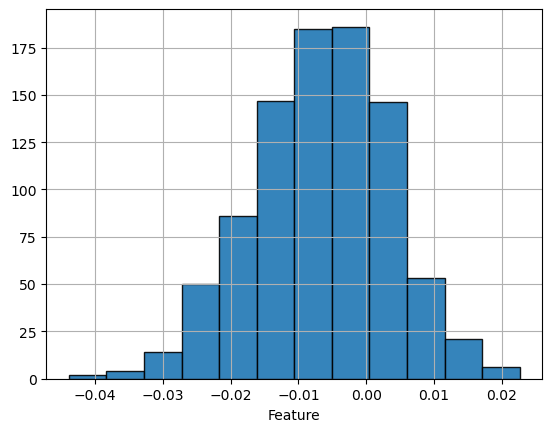

Mean of Feature1: -0.00664910032436132
Variance of Feature1: 0.0001015610251230508


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('embeddingsdata.xlsx')
data = df['embed_345']

num_bins = 12
hist_counts, bin_edges = np.histogram(data, bins=num_bins)

mean_data = np.mean(data)
variance_data = np.var(data, ddof=1)
plt.hist(data, bins=num_bins, edgecolor='black', alpha=0.9)
plt.xlabel('Feature')
plt.grid(True)
plt.show()
print(f'Mean of Feature1: {mean_data}')
print(f'Variance of Feature1: {variance_data}')

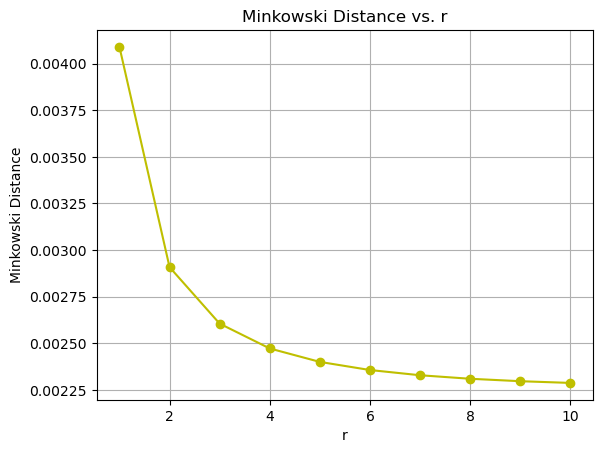

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('embeddingsdata.xlsx')

vector1 = np.array([df['embed_1'][8], df['embed_2'][8]])
vector2 = np.array([df['embed_1'][10], df['embed_2'][10]])

r_values = np.arange(1, 11)

distances = [np.sum(np.abs(vector1 - vector2)**r)**(1/r) for r in r_values]

plt.plot(r_values, distances, marker='o', color='y')
plt.title('Minkowski Distance vs. r')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.grid(True)
plt.show()

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_excel('embeddingsdata.xlsx')
X_train, X_test, y_train, y_test = train_test_split(df[['embed_264', 'embed_265']], df['Label'], test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (630, 2)
X_test shape: (270, 2)
y_train shape: (630,)
y_test shape: (270,)


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_excel('embeddingsdata.xlsx')
X_train, X_test, y_train, y_test = train_test_split(df[['embed_264', 'embed_265']], df['Label'], test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
accuracy = neigh.score(X_test, y_test)
print("Accuracy:", accuracy)

test_vector = X_test.iloc[0] 
predicted_class = neigh.predict([test_vector])

print("Predicted Class:", predicted_class[0])


X_train shape: (630, 2)
X_test shape: (270, 2)
y_train shape: (630,)
y_test shape: (270,)
Accuracy: 0.4148148148148148
Predicted Class: 0


C:\Users\rishi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


accuracies_kNN = []
accuracies_NN = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
k_values = range(1, 12)

for k in k_values:
    kNN_classifier = KNeighborsClassifier(n_neighbors=k)
    kNN_classifier.fit(X_train, y_train)
    y_pred_kNN = kNN_classifier.predict(X_test)
    
    accuracy_kNN = accuracy_score(y_test, y_pred_kNN)
    accuracies_kNN.append(accuracy_kNN)
    NN_classifier = KNeighborsClassifier(n_neighbors=1)
    NN_classifier.fit(X_train, y_train)
        
    y_pred_NN = NN_classifier.predict(X_test)
    accuracy_NN = accuracy_score(y_test, y_pred_NN)
    accuracies_NN.append(accuracy_NN)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies_kNN, marker='o', label='kNN (k=3)')
plt.plot(k_values, accuracies_NN, marker='o', label='NN (k=1)')

plt.title('Accuracy vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'X' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_confusion_matrix = confusion_matrix(y_train_true, y_train_pred)
test_confusion_matrix = confusion_matrix(y_test_true, y_test_pred)

train_precision = precision_score(y_train_true, y_train_pred)
train_recall = recall_score(y_train_true, y_train_pred)
train_f1_score = f1_score(y_train_true, y_train_pred)

test_precision = precision_score(y_test_true, y_test_pred)
test_recall = recall_score(y_test_true, y_test_pred)
test_f1_score = f1_score(y_test_true, y_test_pred)

print("Confusion Matrix (Training Data):\n", train_confusion_matrix)
print("Precision (Training Data):", train_precision)
print("Recall (Training Data):", train_recall)
print("F1-Score (Training Data):", train_f1_score)

print("Confusion Matrix (Test Data):\n", test_confusion_matrix)
print("Precision (Test Data):", test_precision)
print("Recall (Test Data):", test_recall)
print("F1-Score (Test Data):", test_f1_score)